<a href="https://colab.research.google.com/github/pedrolmartini/projetosDS/blob/main/An%C3%A1lise_ENEM_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados do ENEM 2019

Os dados utilizados foram uma amostra dos dados completos, preparada pelos instrutores da Alura. A amostra foi randomizada e tratada de forma a representar satisfatoriamente os dados completos. O conjunto completo se encontra disponível no site do INEP, no link http://inep.gov.br/web/guest/microdados . 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [3]:
dados.shape

(127380, 136)

In [4]:
list(dados.columns)

['NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO',
 'IN_TRANSCRICA

As colunas iniciadas com Q representam informações socioeconômicas de cada candidato. Sua classificação está descrita no Dicionário de Dados disponibilizado no site do Inep. Serão apresentadas conforme forem usadas. 

In [5]:
len(dados["SG_UF_RESIDENCIA"].unique())

27

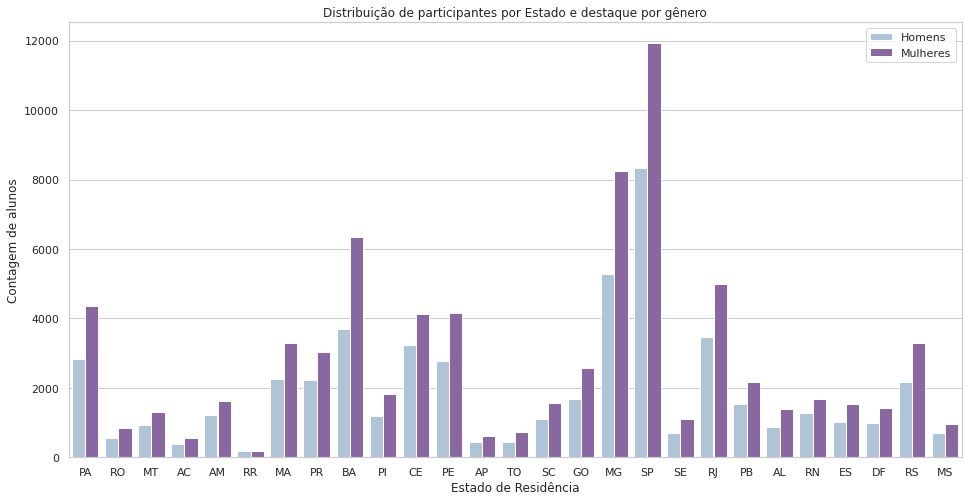

In [6]:

plt.figure(figsize=(16,8))
fig = sns.countplot(data=dados, x='SG_UF_RESIDENCIA', hue='TP_SEXO', palette='BuPu')
fig.set(title='Distribuição de participantes por Estado e destaque por gênero', xlabel='Estado de Residência', ylabel='Contagem de alunos')
fig.legend(('Homens', 'Mulheres'))



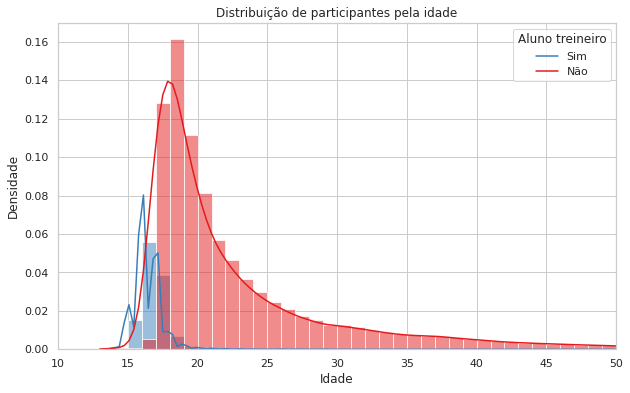

In [7]:
plt.figure(figsize=(10,6))
fig = sns.histplot(data=dados, x='NU_IDADE', stat='density', kde=True, palette='Set1', binwidth=1, hue='IN_TREINEIRO')
fig.set_xlim(left=10, right=50)
fig.set(xlabel='Idade', ylabel='Densidade', title='Distribuição de participantes pela idade')
plt.legend(title='Aluno treineiro', labels=('Sim', 'Não'))

In [8]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


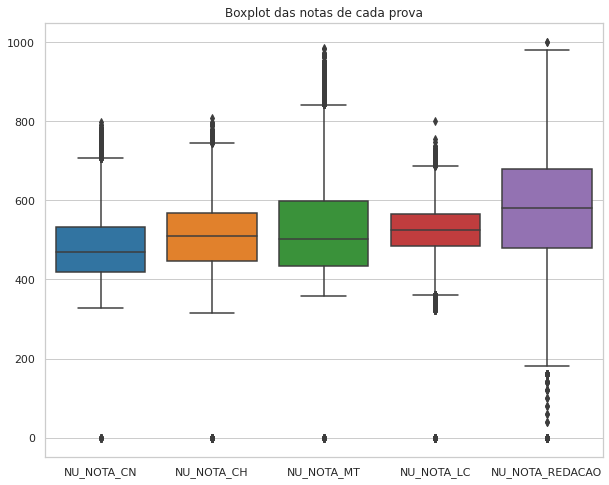

In [9]:

with sns.axes_style("whitegrid"):
  plt.subplots(figsize=(10,8))
  fig = sns.boxplot(data=dados[provas], palette='tab10')
  fig.set(title='Boxplot das notas de cada prova')


# Descrição da classificação dos Treineiros
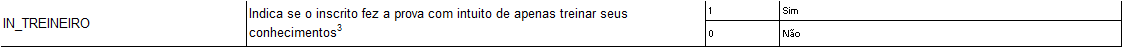

# Descrição da classificação das linguas estrangeiras
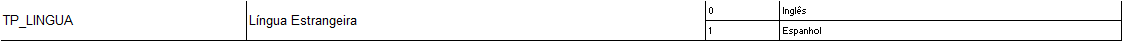

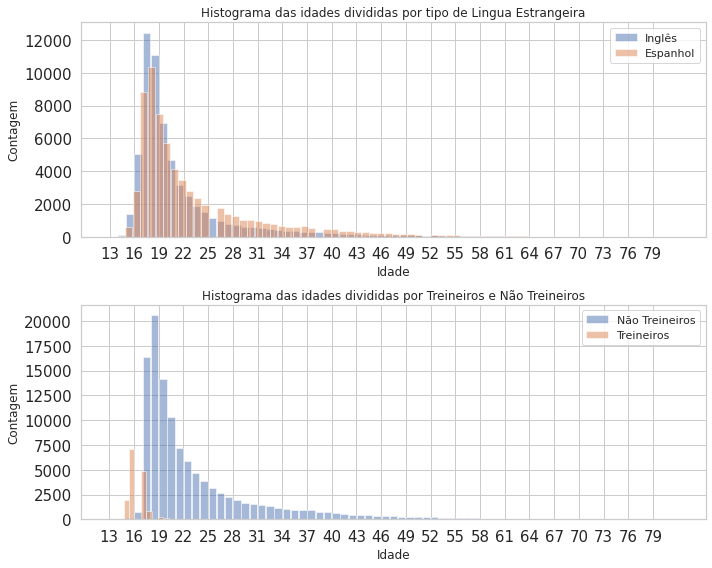

In [10]:
#@title Distribuição das idades por seleção de língua estrangeira e entre treineiros. 

fig, ax = plt.subplots(2,1, figsize=(10,8))
  
dados.groupby("TP_LINGUA")["NU_IDADE"].plot.hist(
      bins=69, grid=True, rwidth=0.95, legend=True, alpha=0.5, ax=ax[0],
      title="Histograma das idades divididas por tipo de Lingua Estrangeira", fontsize=15)

labels=["Inglês","Espanhol"]
ax[0].legend(labels)
ax[0].set_xticks(list(range(13,82,3)))
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Contagem')

dados.groupby("IN_TREINEIRO")["NU_IDADE"].plot.hist(
  bins=69, grid=True, rwidth=0.9, legend=True, alpha=0.5,ax=ax[1], 
  title="Histograma das idades divididas por Treineiros e Não Treineiros", fontsize=15)

labels=["Não Treineiros","Treineiros"]
ax[1].legend(labels)
ax[1].set_xticks(list(range(13,82,3)))
ax[1].set_xlabel('Idade')
ax[1].set_ylabel('Contagem')
plt.tight_layout()
plt.show()


In [11]:

dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")
dados.head(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5
5,190001004841,2019,1503606,Itaituba,15,PA,18,F,1,3,1,1503606.0,Itaituba,15.0,PA,2,0,2,1.0,0,15152120.0,1503606.0,Itaituba,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEDBCBABDDBDCDDEECDEEEBECBCCDEBDACDDEAD...,EEBBACCDBAABCEDECEABCAEAEADEBBACCAADBCEBEADDB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB

Text(0.5, 1.0, 'Soma das notas')

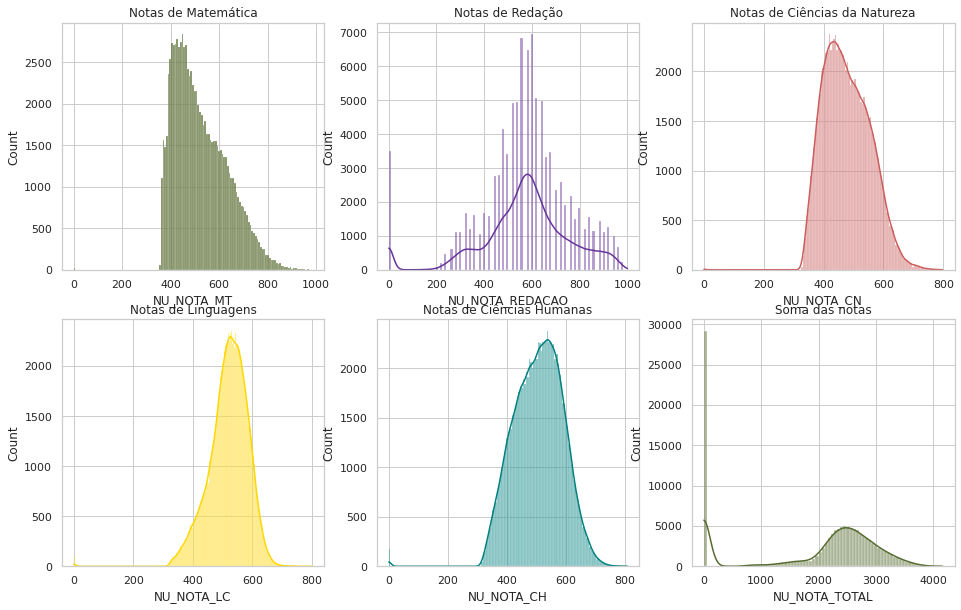

In [12]:


f, axes = plt.subplots(2, 3, figsize=(16, 10))
sns.histplot( dados['NU_NOTA_MT'] , color="darkolivegreen", ax=axes[0, 0], stat='count')
sns.histplot( dados['NU_NOTA_REDACAO'] , color="rebeccapurple", ax=axes[0, 1], stat='count', kde=True)
sns.histplot( dados['NU_NOTA_LC'] , color="gold", ax=axes[1, 0], stat='count', kde=True)
sns.histplot( dados['NU_NOTA_CH'] , color="teal", ax=axes[1, 1], stat='count', kde=True)
sns.histplot(dados['NU_NOTA_CN'], color='indianred', ax=axes[0,2], stat='count', kde=True)
sns.histplot(dados['NU_NOTA_TOTAL'], color='darkolivegreen', ax=axes[1,2], stat='count', kde=True)
axes[0,0].set_title('Notas de Matemática')
axes[0,1].set_title('Notas de Redação')
axes[1,0].set_title('Notas de Linguagens')
axes[1,1].set_title('Notas de Ciências Humanas')
axes[0,2].set_title('Notas de Ciências da Natureza')
axes[1,2].set_title('Soma das notas')


**Aula 02**: Análise exploratória do Dataset. 


Começamos a aula questionando quantos alunos menores de 15 anos fizeram a prova do ENEM 2019. Assim como a questão dos treineiros, esse tópico também reflete a participação de alunos jovens e, nesse caso, alunos que ainda não chegaram ao Ensino Médio.

Text(0.5, 1.0, 'Distribuição de alunos com menos de 15 anos')

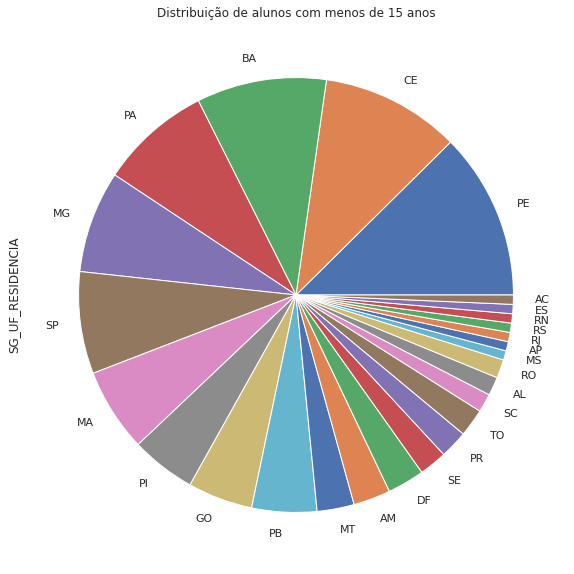

In [13]:
alunos_menor_quartoze = dados.query("NU_IDADE <= 14")
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(12,10))
plt.title('Distribuição de alunos com menos de 15 anos')

Interessante destacar que os dados apresentam informações socioeconômicas de cada candidato, como renda familiar, quantidade de carros, móveis e cômodos na casa do candidato. 
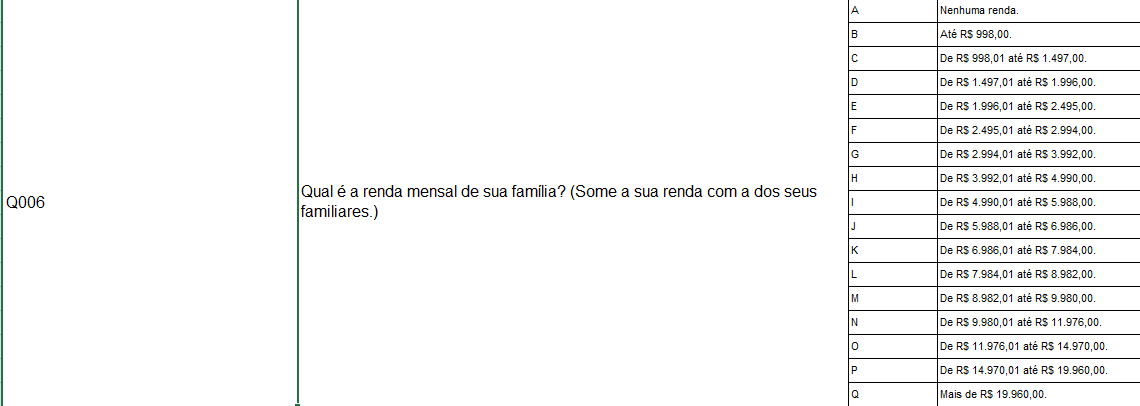

In [14]:
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

Muitos candidatos possuem notas zeradas, seja em uma das provas ou em todas. Essas notas nulas acabam atrapalhando a análise estatística, por isso é necessário criar um novo objeto sem as notas zeradas para se ter dados estatisticos mais precisos.

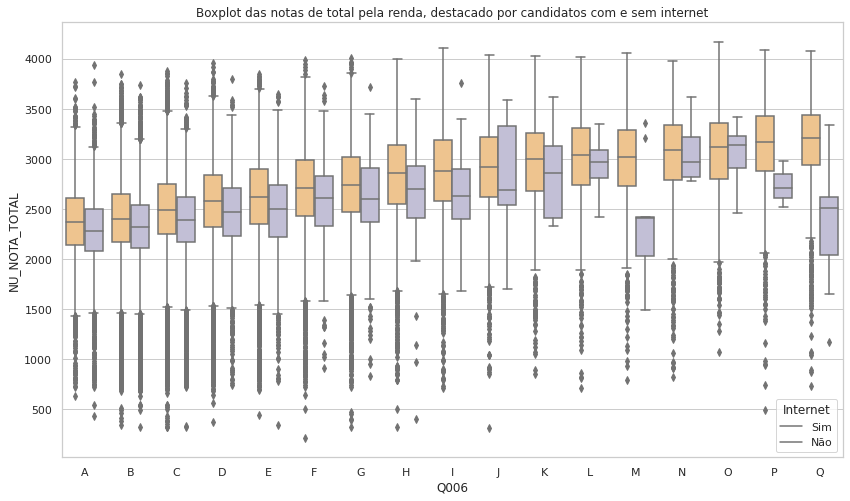

In [15]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
plt.figure(figsize=(14, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, 
            hue="Q025", order = renda_ordenada, palette='PuOr')
plt.title("Boxplot das notas de total pela renda, destacado por candidatos com e sem internet")
plt.legend(title='Internet', labels=('Sim', 'Não'))


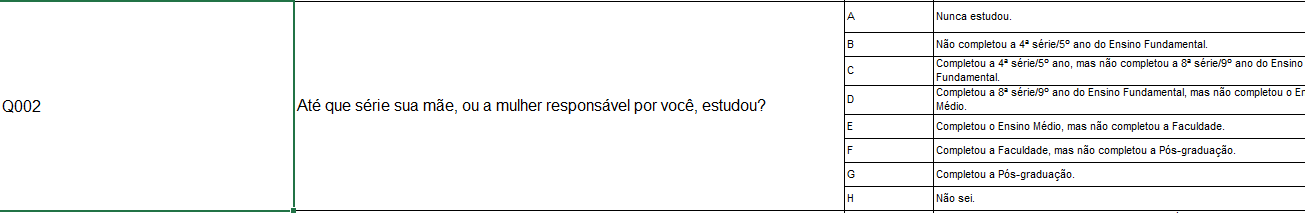

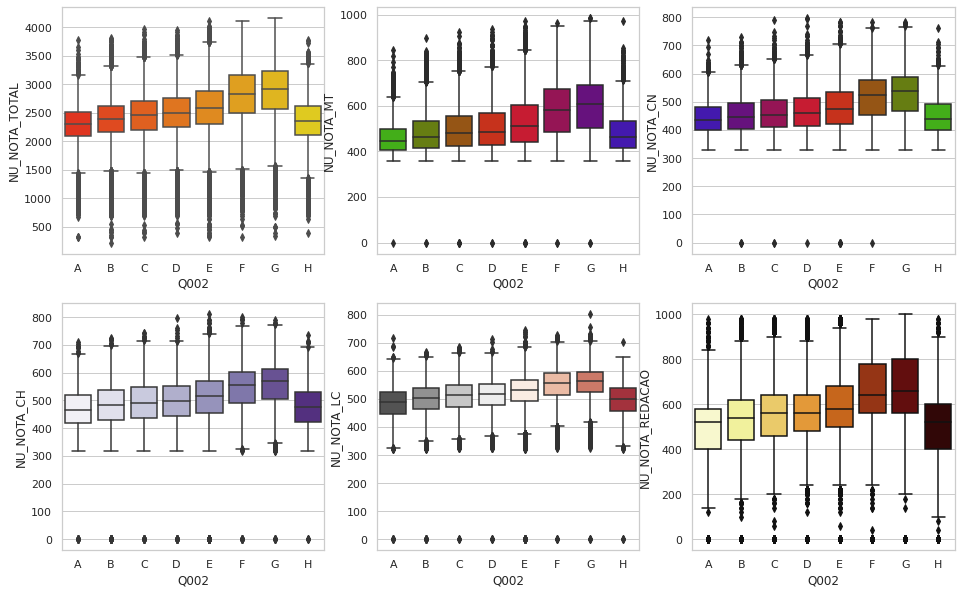

In [16]:
f, axes = plt.subplots(2,3, figsize=(16,10))
profissao_mae_ordenada = dados_sem_notas_zero['Q002'].unique()
profissao_mae_ordenada.sort()
sns.boxplot(x="Q002", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, palette='autumn', ax=axes[0,0], order=profissao_mae_ordenada)
sns.boxplot(x="Q002", y = "NU_NOTA_MT", data = dados_sem_notas_zero, palette='brg_r', order=profissao_mae_ordenada, ax=axes[0,1])
sns.boxplot(x="Q002", y = "NU_NOTA_CN", data = dados_sem_notas_zero, palette='brg', order=profissao_mae_ordenada, ax=axes[0,2])
sns.boxplot(x="Q002", y = "NU_NOTA_CH", data = dados_sem_notas_zero, palette='Purples', order=profissao_mae_ordenada, ax=axes[1,0])
sns.boxplot(x="Q002", y = "NU_NOTA_LC", data = dados_sem_notas_zero, palette='RdGy_r', order=profissao_mae_ordenada, ax=axes[1,1])
sns.boxplot(x="Q002", y = "NU_NOTA_REDACAO", data = dados_sem_notas_zero, palette='afmhot_r', order=profissao_mae_ordenada, ax=axes[1,2])

***Aula 03***: Análise de correlação entre as notas de cada prova. 

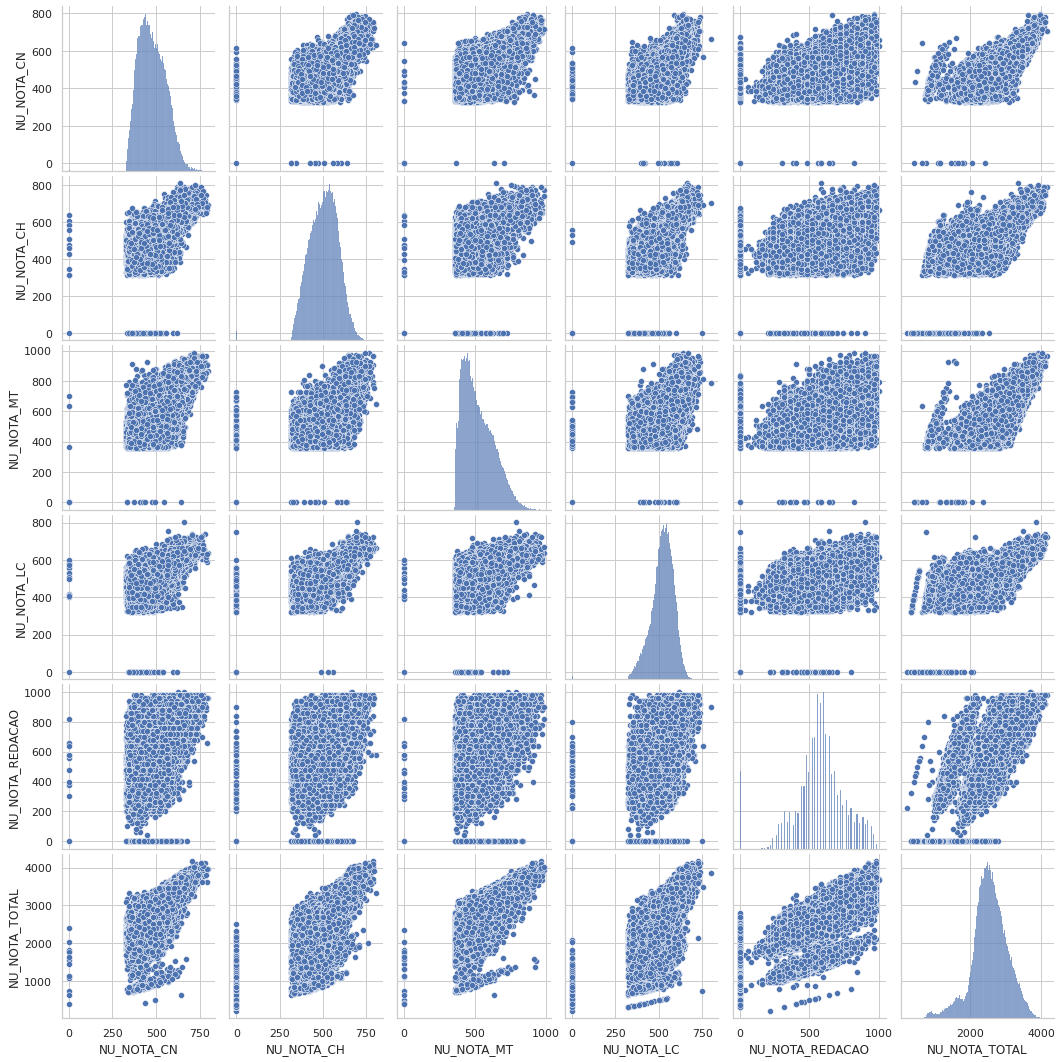

In [17]:
sns.pairplot(data=dados_sem_notas_zero[provas], palette='Purples')


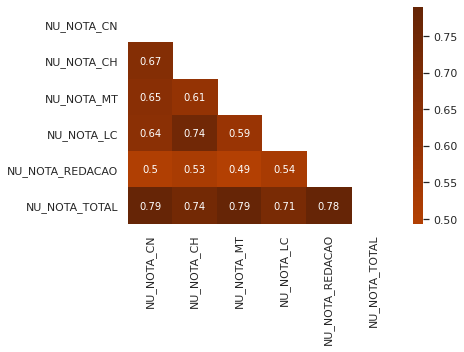

In [18]:
correlacao = dados_sem_notas_zero[provas].corr()
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlacao, cmap='YlOrBr', mask=mask, center=0, annot=True)

Text(0.5, 1.0, 'Distribuição da nota máxima')

<Figure size 1152x576 with 0 Axes>

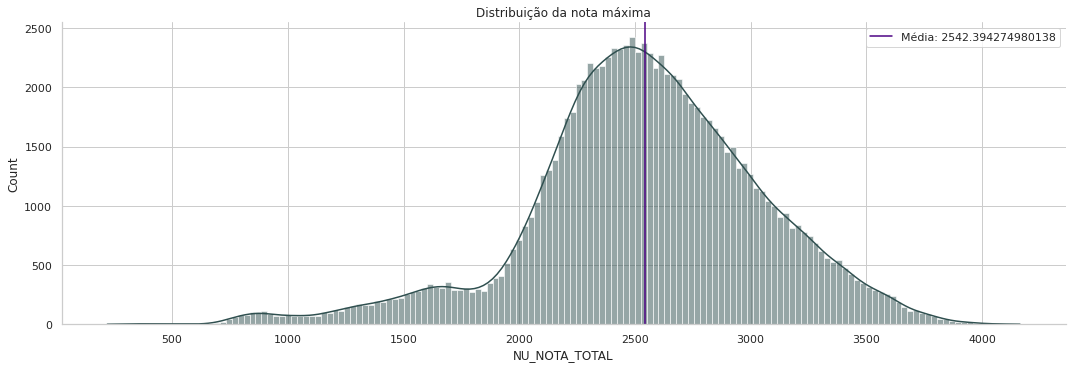

In [19]:
nota_TOTAL_media = dados_sem_notas_zero['NU_NOTA_TOTAL'].mean()

plt.figure(figsize=(16,8))
sns.displot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", kde=True, aspect=3, color='darkslategrey')
line1 = plt.axvline(nota_TOTAL_media, ymax=1, ymin=0, color='indigo', label=('Média: ' + str(nota_TOTAL_media)))
plt.legend()
plt.title('Distribuição da nota máxima')

Análise com os dados regionais do RS. 

In [20]:
dados_RS = dados_sem_notas_zero.query('SG_UF_RESIDENCIA == "RS"')
dados_RS.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
17134,190001684775,2019,4315602,Rio Grande,43,RS,20,F,1,2,1,4314407.0,Pelotas,43.0,RS,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ADCDBBACECAEABDCABEDAECABBDCDCDDAAAACBDCA...,NaN,1,NaN,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,NaN,1.0,100.0,120.0,80.0,120.0,80.0,500.0,B,B,C,D,2,E,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,B,B,1418.4
17135,190001684810,2019,4314902,Porto Alegre,43,RS,21,F,1,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCADDCBAAEDBDCDADECDAECEDCBCCDEBDABDDDEC...,DDEBADCBCDBACEDECEDCBDECADCEBBACCABACADAEACDC,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,200.0,160.0,160.0,140.0,780.0,C,G,B,D,4,I,D,C,E,B,A,B,A,B,A,B,A,B,C,A,B,D,A,B,B,3310.4
17136,190001684848,2019,4316907,Santa Maria,43,RS,17,F,1,3,1,1503606.0,Itaituba,15.0,PA,2,0,2,1.0,0,43121934.0,4316907.0,Santa Maria,43.0,RS,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,DDABE99999CCBEDCDADCDAEEDEAECEEDCCCDEBAACDCEDC...,CBBDCBEBDEBBABABBDEABCBCADBAEBCBEBBACBCACEBBB,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,180.0,160.0,160.0,160.0,820.0,G,G,F,F,8,P,A,B,C,B,A,B,B,B,A,A,A,A,C,A,B,E,A,C,B,3023.4
17137,190001684857,2019,4314407,Pelotas,43,RS,35,M,3,0,1,4314407.0,Pelotas,43.0,RS,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999AABDABACCCDEBECAADDABAEDECDDBDEBCEAACCACC...,DAAECBAACCCBABCBBDBCCEDCBDDEABBBEAADEEBDBEDDB,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,140.0,120.0,100.0,40.0,520.0,D,E,F,F,4,J,A,B,C,B,A,B,B,B,B,B,A,B,D,B,B,D,B,B,B,2905.4
17140,190001684958,2019,4301859,Barra do Guarita,43,RS,17,F,1,3,0,NaN,NaN,NaN,NaN,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999DBAEDCBDBBDCECBCBDCDCAABBCACDDAEEDAECABCA...,DAACCBACCACEDDDCADEBBDECDECEBBCCBDDAECCDAEDBE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,100.0,40.0,40.0,120.0,20.0,320.0,H,B,F,A,2,B,A,B,B,A,A,B,B,A,A,A,A,A,B,A,A,B,A,A,A,2204.4


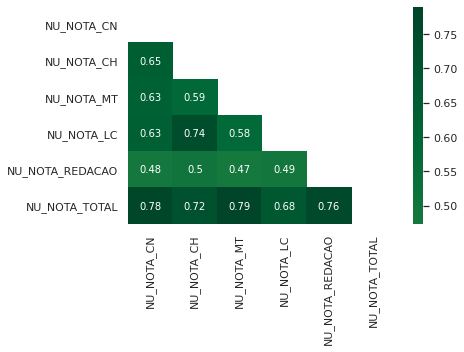

In [21]:
correlacao_RS = dados_RS[provas].corr()
mask = np.zeros_like(correlacao_RS)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlacao_RS, cmap='YlGn', mask=mask, center=0, annot=True)

[Text(0, 0.5, 'Densidade'),
 Text(0.5, 0, 'Idade'),
 Text(0.5, 1.0, 'Distribuição de participantes pela idade')]

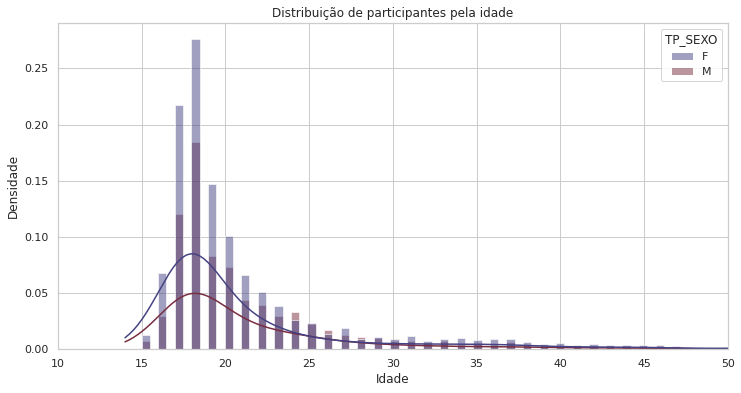

In [22]:
plt.figure(figsize=(12,6))
fig = sns.histplot(data=dados_RS, x='NU_IDADE', stat='density', kde=True, palette='icefire', hue='TP_SEXO',  )
fig.set_xlim(left=10, right=50)
fig.set(xlabel='Idade', ylabel='Densidade', title='Distribuição de participantes pela idade')

[Text(0, 0.5, 'Contagem de alunos'),
 Text(0.5, 0, 'Renda familiar'),
 Text(0.5, 1.0, 'Distribuição de participantes pela renda')]

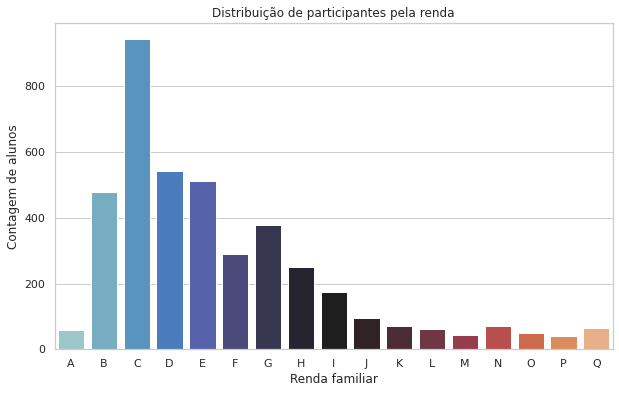

In [23]:
plt.figure(figsize=(10,6))
fig = sns.countplot(data=dados_RS, x='Q006', order=renda_ordenada, palette='icefire')
fig.set(xlabel='Renda familiar', ylabel='Contagem de alunos', title='Distribuição de participantes pela renda')

Text(0.5, 1.0, 'Distribuição da Nota Total por quantidade de computadores na residência do aluno')

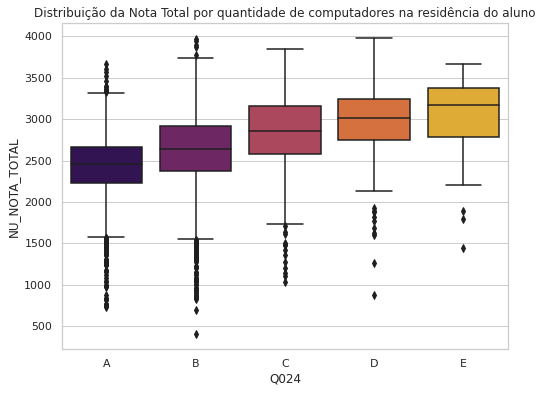

In [24]:
plt.figure(figsize=(8,6))
ordem_Q024 = dados_RS['Q024'].unique()
ordem_Q024.sort()
fig = sns.boxplot(data=dados_RS, x='Q024', y='NU_NOTA_TOTAL', order=ordem_Q024, palette='inferno')
plt.title('Distribuição da Nota Total por quantidade de computadores na residência do aluno')

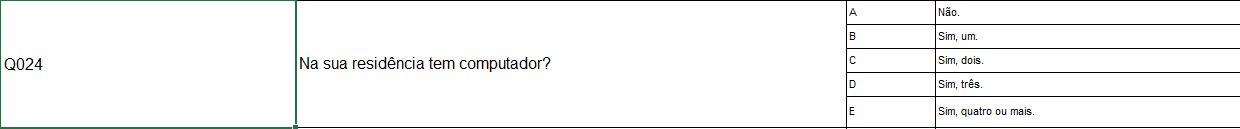

**Aula 04**: Elaboração de um modelo preditivo utilizando técnicas de Machine Learning. 

In [25]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[prova_saida]

In [26]:
# Dividindo os dados em sets de treino e de teste. 

x = notas_entrada
y = notas_saida 

from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)

In [27]:
# Modelo criado na aula utilizando o algoritmo de Support Vector Regression (LinearSVR)
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED, max_iter=3000)
modelo.fit(x_treino, y_treino)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=3000,
          random_state=4321, tol=0.0001, verbose=0)

Text(0, 0.5, 'Erro')

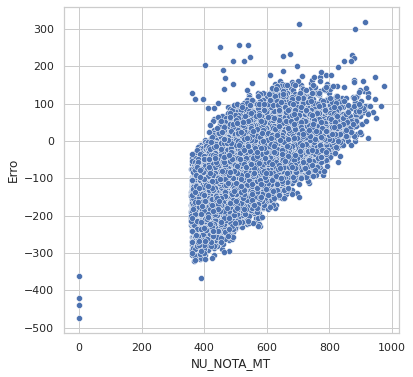

In [28]:
predicoes_matematica = modelo.predict(x_teste)
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica)
plt.ylabel('Erro')

No gráfico acima podemos notar uma tendência de erro no modelo. Quanto maior a nota original, maior o erro de predição do modelo. Também criamos um modelo utilizando o algoritmo DummyRegressor, que apresentou erro quadrático um pouco menor.

In [29]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [30]:
from sklearn.metrics import mean_squared_error

erro_SVR = mean_squared_error(y_teste, predicoes_matematica)
erro_dummy = mean_squared_error(y_teste, dummy_predicoes)

print(erro_SVR)
print(erro_dummy)

12094.28340458742
12063.645588509502


Testando o algoritmo de regressão de Ridge para minimizar o erro. 

Text(0, 0.5, 'Erro')

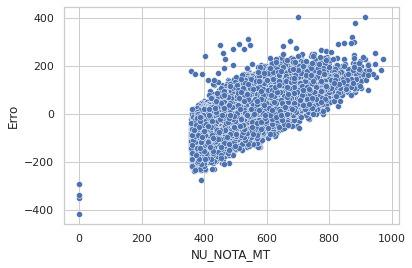

In [31]:
from sklearn.linear_model import Ridge

modelo_ridge = Ridge(alpha=0.1)
modelo_ridge.fit(x_treino, y_treino)
predicao_ridge = modelo_ridge.predict(x_teste)

sns.scatterplot(x=y_teste, y=y_teste - predicao_ridge)
plt.ylabel('Erro')

In [32]:
erro_ridge = mean_squared_error(y_teste, predicao_ridge)
print(erro_ridge)

5961.37221239677


O modelo Ridge apresentou um erro menor do que os outros modelos utilizados. Isso ocorre devido ao fato do algoritmo modificar a função de perda, de modo a reduzir a complexidade do modelo. Essa modificação é feita através da adição de um parâmetro de penalidade equivalente ao quadrado da magnitude dos coeficientes.

Criando um modelo preditivo utilizando o algoritmo Lasso.

In [33]:
from sklearn.linear_model import Lasso
modelo_lasso = Lasso(alpha=1)
modelo_lasso.fit(x_treino, y_treino)
predicao_lasso = modelo_lasso.predict(x_teste)
erro_lasso = mean_squared_error(y_teste, predicao_lasso)
print(erro_lasso)

5961.3623430204125


O modelo Lasso também é um algoritmo que também visa minimizar a função de perda. Lasso significa *Least Absolute Shrinkage and Selection Operator*, ou Operador de Seleção e Mínimo Encolhimento Absoluto. Nesse modelo, a função de perda é minimizada através da limitação da soma dos valores absolutos dos coeficientes do modelo. 

Testarei outro modelo algorítmico de regressão muito utilizado, as árvores de decisão. Esse modelo permite uma boa regulação de parâmetros para adaptar o modelo aos dados que analisamos. 

In [35]:
from sklearn.ensemble import RandomForestRegressor

modelo_floresta = RandomForestRegressor(max_depth=8, n_estimators=500, random_state=0)
modelo_floresta.fit(x_treino, y_treino)
predicao_arvore = modelo_floresta.predict(x_teste)
erro_arvore = mean_squared_error(y_teste, predicao_arvore)
print(erro_arvore)



5355.873684866707


Testando a competência dos modelos utilizando a métrica R2.

In [37]:
from sklearn.metrics import r2_score

r2_svr = r2_score(y_teste, predicoes_matematica)
r2_dummy = r2_score(y_teste, dummy_predicoes)
r2_ridge = r2_score(y_teste, predicao_ridge)
r2_lasso = r2_score(y_teste, predicao_lasso)
r2_floresta = r2_score(y_teste, predicao_arvore)

print('R2 do modelo SVR: ' + str(r2_svr))
print('R2 do modelo Dummy: ' + str(r2_dummy))
print('R2 do modelo Ridge: ' + str(r2_ridge))
print('R2 do modelo Lasso: ' + str(r2_lasso))
print('R2 do modelo RandomForest: ' + str(r2_floresta))

R2 do modelo SVR: -0.002705430163076228
R2 do modelo Dummy: -0.00016532890019238522
R2 do modelo Ridge: 0.5057582091778817
R2 do modelo Lasso: 0.5057590274220831
R2 do modelo RandomForest: 0.5559585097000153
